In [1]:
import os
import sleep_study as ss
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [2]:
ss.init()

age information stored in /home/harlinl/sleep_study_harlin/age_file.csv


In [3]:
# variable names in health data
print(ss.info.HEALTH_DATA_FNS)

for name in ss.info.HEALTH_DATA_FNS:
    df = ss.info.load_health_info(name)
    variables = df.columns.values
    variables = [v.replace('_', ' ').lower() for v in variables]
    v = ", ".join(variables)
    v = v.replace('id', 'ID')
    v = v.replace('rxnorm', 'RxNorm')
    v = v.replace('yn', 'Y/N')
    v = v.replace('icu', 'ICU')
    print(name)
    print(v)
    print()

['DEMOGRAPHIC.csv', 'DIAGNOSIS.csv', 'ENCOUNTER.csv', 'MEASUREMENT.csv', 'MEDICATION.csv', 'PROCEDURE_SURG_HX.csv', 'PROCEDURE.csv', 'SLEEP_ENC_ID.csv', 'SLEEP_STUDY.csv']
DEMOGRAPHIC.csv
study pat ID, birth date, pcori gender cd, pcori race cd, pcori hispanic cd, gender descr, race descr, ethnicity descr, language descr, peds gest age num weeks, peds gest age num days



/home/harlinl/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


DIAGNOSIS.csv
study dx ID, study enc ID, study pat ID, dx start datetime, dx end datetime, dx source type, dx enc type, dx code type, dx code, dx name, dx alt code, class of problem, chronic Y/N, prov ID



/home/harlinl/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (12,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ENCOUNTER.csv
study enc ID, study pat ID, encounter date, visit start datetime, visit end datetime, adt arrival datetime, ed departure datetime, encounter type, visit type cd, visit type descr, ICU visit Y/N, prov ID, prov type, dept ID, dept specialty, admit source, hosp admit source, discharge disposition, discharge destination, drg code, drg name, visit reason

MEASUREMENT.csv
study meas ID, study pat ID, study enc ID, meas recorded datetime, meas type, meas value number, meas value text, meas source, study prov ID

MEDICATION.csv
study med ID, study enc ID, study pat ID, med start datetime, med end datetime, med order datetime, med taken datetime, med source type, quantity, days supply, frequency, effective drug dose, eff drug dose source value, drug dose unit, refills, RxNorm code, RxNorm term type, medication descr, generic drug descr, drug order status, drug action, route, route source value, prescribing prov ID, pharm class, pharm subclass, thera class, thera subclass

PROCEDUR

In [4]:
# stats for diagnosis
diag_df = ss.info.load_health_info('DIAGNOSIS.csv')
print('dx columns', diag_df.columns)
dx_name = diag_df["DX_NAME"]
dx_counts = dx_name.value_counts()
print('total number of dx', len(dx_counts))
print('dx more than 4500 counts', sum(dx_counts>4500))
print('top 30 dx', dx_counts[:30])

dx columns Index(['STUDY_DX_ID', 'STUDY_ENC_ID', 'STUDY_PAT_ID', 'DX_START_DATETIME',
       'DX_END_DATETIME', 'DX_SOURCE_TYPE', 'DX_ENC_TYPE', 'DX_CODE_TYPE',
       'DX_CODE', 'DX_NAME', 'DX_ALT_CODE', 'CLASS_OF_PROBLEM', 'CHRONIC_YN',
       'PROV_ID'],
      dtype='object')
total number of dx 30394
dx more than 4500 counts 36
top 30 dx Mixed receptive-expressive language disorder                                  26546
Snoring                                                                       17754
Lack of normal physiological development, unspecified                         16051
Other physical therapy                                                        15733
Care involving speech-language therapy                                        14927
Feeding difficulties                                                          12285
Cough                                                                         11954
Routine infant or child health check                                 

In [5]:
# stats for measurement
df = ss.info.load_health_info('MEASUREMENT.csv')
vcs = df['MEAS_TYPE'].value_counts()
print(vcs/len(df['MEAS_TYPE'])*100)

BMI       47.581705
BMIPCT    28.740502
BP        23.677793
Name: MEAS_TYPE, dtype: float64


In [6]:
# stats for annotations
path = os.path.join(ss.data_dir, 'Sleep_Data')
study_list = [x[:-4] for x in os.listdir(path) if x.endswith('edf')]
dfs = []
an_lens = []
for study in study_list:
    df1 = pd.read_csv(os.path.join(path, study +'.tsv'), sep='\t')
    if len(df1) > 0:
        try:
            dfs.append(df1[['duration', 'description']])
        except:
            print(ss)
            print(df1.columns)
            print(df1)
    else:
        print(ss)
    
    an_lens.append(len(df1))
    
df = dfs[0].append(dfs[1:])


print('total number of annotations', len(df))
print('from this many files', len(an_lens))
assert sum(an_lens) == len(df)

print('mean number of annotations per study', np.mean(an_lens))
print('median', np.median(an_lens))
print('max', np.max(an_lens))
print('min', np.min(an_lens))

total number of annotations 5046370
from this many files 3984
mean number of annotations per study 1266.6591365461848
median 1216.0
max 6047
min 5


In [7]:
# descriptions
vcs = df['description'].value_counts()
print('unique annotation descriptions', len(vcs))
print('Top 20 annotations')
print(vcs[:20])
print()

# sleep stages
print('W', vcs.loc['Sleep stage W'], np.round(vcs.loc['Sleep stage W']/len(df)*100,2), '%')
print('N1', vcs.loc['Sleep stage N1'], np.round(vcs.loc['Sleep stage N1']/len(df)*100, 2), '%')
print('N2', vcs.loc['Sleep stage N2'], np.round(vcs.loc['Sleep stage N2']/len(df)*100,2), '%')
print('N3', vcs.loc['Sleep stage N3'], np.round(vcs.loc['Sleep stage N3']/len(df)*100,2), '%')
print('R', vcs.loc['Sleep stage R'], np.round(vcs.loc['Sleep stage R']/len(df)*100,2), '%')

tmp = vcs.loc['Sleep stage W'] + vcs.loc['Sleep stage N1'] + vcs.loc['Sleep stage N2'] + vcs.loc['Sleep stage N3'] + vcs.loc['Sleep stage R']
print('all sleep stages w/o ?', tmp, np.round(tmp/len(df)*100,2))

print('?', vcs.loc['Sleep stage ?'], np.round(vcs.loc['Sleep stage ?']/len(df)*100,2), '%')
tmp += vcs.loc['Sleep stage ?']
print('all sleep stages incl. ?', tmp, np.round(tmp/len(df)*100,2), '%')

unique annotation descriptions 35821
Top 20 annotations
Sleep stage N2                      1383765
Sleep stage N3                       875486
Sleep stage W                        665676
Sleep stage R                        611320
Sleep stage ?                        347294
Oxygen Desaturation                  215280
Oximeter Event                       161644
EEG arousal                          146052
Sleep stage N1                       128410
Obstructive Hypopnea                  42179
Limb Movement                         36856
Gain/Filter Change                    27857
move                                  26331
Body Position: Supine                 23239
Sleep stage 2                         19608
Obstructive Apnea                     15782
Hypopnea                              14522
Montage:Channel Test Referential      13740
Body Position: Left                   13700
Body Position: Right                  13656
Name: description, dtype: int64

W 665676 13.19 %
N1 128410 2.54

In [8]:
freqs = np.zeros((len(ss.data.study_list),1))
nchans = np.zeros((len(ss.data.study_list),1))
data_lens = np.zeros((len(ss.data.study_list),1))
stages = np.zeros((len(ss.data.study_list),6))

no_W = []
no_N1 = []
no_N2 = []
no_N3 = []
no_R = []
no_q = []

for i, name in enumerate(ss.data.study_list):
    raw = ss.data.load_study(name)
    freqs[i]= raw.info['sfreq']
    nchans[i]=raw.info['nchan']
    data_lens[i]=len(raw)/raw.info['sfreq']
    df = pd.read_csv(os.path.join(ss.data_dir, 'Sleep_Data', name+ '.tsv'), sep='\t')
    vcs = df['description'].value_counts()
    try:
        stages[i, 0] = vcs.loc['Sleep stage W']
    except Exception:
        stages[i, 0] = 0
        print(name, 'W')
        no_W.append(name)
    try:
        stages[i, 1] = vcs.loc['Sleep stage N1']
    except Exception:
        stages[i, 1] = 0
        print(name, 'N1')
        no_N1.append(name)
    try:
        stages[i, 2] = vcs.loc['Sleep stage N2']
    except Exception:
        stages[i, 2] = 0
        print(name, 'N2')
        no_N2.append(name)
    try:
        stages[i, 3] = vcs.loc['Sleep stage N3']
    except Exception:
        stages[i, 3] = 0
        print(name, 'N3')
        no_N3.append(name)
    try:
        stages[i, 4] = vcs.loc['Sleep stage R']
    except Exception:
        stages[i, 4] = 0
        print(name, 'R')
        no_R.append(name)
    try:
        stages[i, 5] = vcs.loc['Sleep stage ?']
    except Exception:
        stages[i, 5] = 0
        print(name, '?')
        no_q.append(name)


10012_22912 R
10030_16192 N1
10030_16192 N2
10030_16192 N3
10135_9082 N1
1015_22468 N1
1015_22468 N2
1015_22468 N3
1015_22468 ?
10201_9262 N1
10351_643 R
10582_25837 N1
10582_25837 N2
10582_25837 R
10717_23026 N1
10717_23026 N2
10717_23026 N3
1075_5416 W
1075_5416 N1
1075_5416 N2
1075_5416 N3
1075_5416 R
10780_19411 R
10924_2065 N1
10924_2065 N2
10924_2065 N3
1093_1408 R
11041_18442 N1
11089_15991 N1
11089_15991 N2
11089_15991 N3
11092_10465 R
11122_4258 W
11122_4258 N1
11122_4258 N2
11122_4258 N3
11122_4258 R
11122_7639 R
11215_8071 R
11329_19021 N1
11329_19021 N2
11329_19021 N3
11338_3454 R
11362_10972 N1
11362_10972 R
11434_17365 N1
11434_17365 N2
11434_17365 N3
11527_7306 W
11527_7306 N1
11527_7306 N2
11527_7306 N3
11527_7306 R
11650_24580 N1
11800_17395 N1
11971_26134 N1
11971_7141 N1
11971_7141 N2
11995_12805 ?
12226_22747 N1
12226_22747 N2
12226_22747 N3
12406_13414 R
12448_12664 N1
12448_21766 N1
12448_6832 N1
12463_1105 N1
12535_24715 R
12637_8776 N3
12664_15928 ?
127_19126 N1

In [9]:
# stats for sampling frequency
x, y = np.unique(freqs, return_counts=True)
z = np.round(y/sum(y)*100,2)
for i in range(len(x)):
    print(x[i],'Hz', y[i], z[i], '%')

255.99973315988726 Hz 1 0.03 %
256.0 Hz 3203 80.4 %
400.0 Hz 581 14.58 %
512.0 Hz 199 4.99 %


In [10]:
# stats for number of channels
x, y = np.unique(nchans, return_counts=True)
z = np.round(y/sum(y)*100,2)

for i in range(len(x)):
    print(x[i], y[i], z[i], '%')

9.0 2 0.05 %
24.0 26 0.65 %
25.0 820 20.58 %
26.0 1972 49.5 %
27.0 5 0.13 %
28.0 134 3.36 %
29.0 1012 25.4 %
40.0 12 0.3 %
56.0 1 0.03 %


min (sec) 180.0
max (hour) 16.547777777777778
mean (hour) 10.262169635556113
median (hour) 10.37111111111111
between 8 and 12 hours 3779
94.85 %


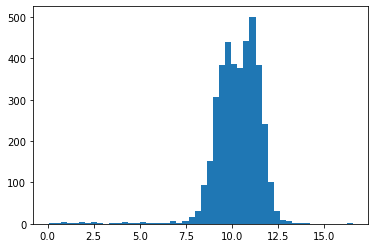

In [11]:
# stats for length of recording
z = data_lens/3600

print('min (sec)', np.min(data_lens))
print('max (hour)', np.max(z))
print('mean (hour)', np.mean(z))
print('median (hour)', np.median(z))

plt.hist(z, 50)

print('between 8 and 12 hours', len(np.where((z <12) & (z>8))[0]))
print(np.round(len(np.where((z <12) & (z>8))[0])/len(z)*100, 2), '%')

In [12]:
# stats for sleep stages
print('no. of studies with no W', len(no_W))
print('no. of studies with no N1', len(no_N1))
print('no. of studies with no N2', len(no_N2))
print('no. of studies with no N3', len(no_N3))
print('no. of studies with no R', len(no_R))
print('no. of studies with no ?', len(no_q))

no. of studies with no W 32
no. of studies with no N1 225
no. of studies with no N2 126
no. of studies with no N3 121
no. of studies with no R 133
no. of studies with no ? 20


In [13]:
print(stages.shape)
print(stages)
sleep_hrs = np.sum(stages[:,:-1],1)*30/3600
print(sleep_hrs)

(3984, 6)
[[211.  31. 429. 130. 111. 115.]
 [115.   9. 395. 301. 162.  68.]
 [ 50.  42. 481. 200. 156. 126.]
 ...
 [104.   8. 348. 254. 183.  63.]
 [166.  49. 422. 227. 189.  91.]
 [299.   0.   0.   0.  77. 136.]]
[7.6        8.18333333 7.74166667 ... 7.475      8.775      3.13333333]


min 0.0
max 11.65
mean 7.665363537483267
median 7.683333333333334
sleep between 6 and 10 hours
3850
96.64 %


(array([  33.,    3.,    7.,   22.,   17.,    9.,    6.,    5.,    2.,
           7.,   37.,  340., 1275., 1067.,  632.,  377.,  120.,   23.,
           0.,    2.]),
 array([ 0.    ,  0.5825,  1.165 ,  1.7475,  2.33  ,  2.9125,  3.495 ,
         4.0775,  4.66  ,  5.2425,  5.825 ,  6.4075,  6.99  ,  7.5725,
         8.155 ,  8.7375,  9.32  ,  9.9025, 10.485 , 11.0675, 11.65  ]),
 <BarContainer object of 20 artists>)

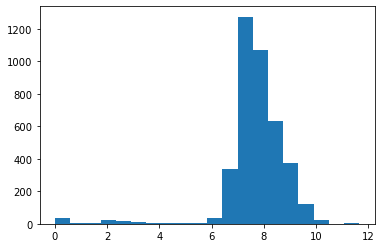

In [14]:
print('min', np.min(sleep_hrs))
print('max', np.max(sleep_hrs))
print('mean', np.mean(sleep_hrs))
print('median', np.median(sleep_hrs))

print('sleep between 6 and 10 hours')
print(len(np.where((sleep_hrs <10) & (sleep_hrs>6))[0]))
print(np.round(len(np.where((sleep_hrs <10) & (sleep_hrs>6))[0])/len(sleep_hrs)*100,2), '%')

plt.hist(sleep_hrs, 20)